# C1 C2 Pooling C3 Pooling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, explained_variance_score

import keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
dps1200 = pd.read_csv("dps1200.csv")

In [4]:
features = dps1200.iloc[:, 4:].values
labels = dps1200.iloc[:, 0].values

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
## The model
## Hyperparameters for the network
DENSE = 512      # Number of neurons in the DENSE (a.k.a Fully connected) layer
DROPOUT = 0.3  # Dropout rate
C1_K  = 3       # Number of kernels/filters for conv. first layer
C1_S  = 40      # Width of the filters for first conv. layer
C2_K  = 3       # Number of kernels/filters for second conv. layer
C2_S  = 40 
input_dim = train_data.shape[1]
def make_model():
    """ This functions outputs the CNN model already compiled """
    model = keras.Sequential()
    model.add(keras.layers.Input((input_dim, 1)))
    model.add(keras.layers.GaussianNoise(0.0001))

    model.add(keras.layers.Conv1D(C1_K, (C1_S), padding='valid', activation='relu'))
    
    model.add(keras.layers.Conv1D(C1_K, (C1_S), padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(keras.layers.Conv1D(C1_K, (C1_S), padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(DROPOUT))
    
    model.add(keras.layers.Dense(DENSE, activation='relu'))
    model.add(keras.layers.Dense(DENSE, activation='relu'))
    model.add(keras.layers.Dense(DENSE, activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))

    ## Compile options for the model
    model.compile(loss=tf.keras.losses.Huber(), optimizer=keras.optimizers.Adam(learning_rate=0.004), metrics=['mean_absolute_error'])
    return model

model_cnn = make_model()

In [7]:
print(model_cnn.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 410, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 371, 3)         │           123 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 332, 3)         │           363 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 166, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 127, 3)         │           363 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 63, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 189)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 189)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        97,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,954 (2.38 MB)

 Trainable params: 623,954 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
cnn = model_cnn.fit(train_data, train_labels, epochs=1000, batch_size=45, validation_split=0.2)

Epoch 1/1000


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1547.9897 - mean_absolute_error: 1550.6077 - val_loss: 686.1620 - val_mean_absolute_error: 685.4213
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 430.4978 - mean_absolute_error: 431.5011 - val_loss: 341.4782 - val_mean_absolute_error: 341.9958
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 269.2116 - mean_absolute_error: 269.9114 - val_loss: 217.5267 - val_mean_absolute_error: 218.6193
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 205.3808 - mean_absolute_error: 205.9659 - val_loss: 158.6275 - val_mean_absolute_error: 161.3729
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 192.4628 - mean_absolute_error: 192.8986 - val_loss: 163.1743 - val_mean_absolute_error: 165.0485
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 188.9104 - mean_absolute_error: 189.4921 - val_loss: 153.5332 - val_mean_absolute_error: 155.6024
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

In [9]:
print(model_cnn.evaluate(test_data, test_labels, verbose=False))

[95.05307006835938, 77.28646850585938]


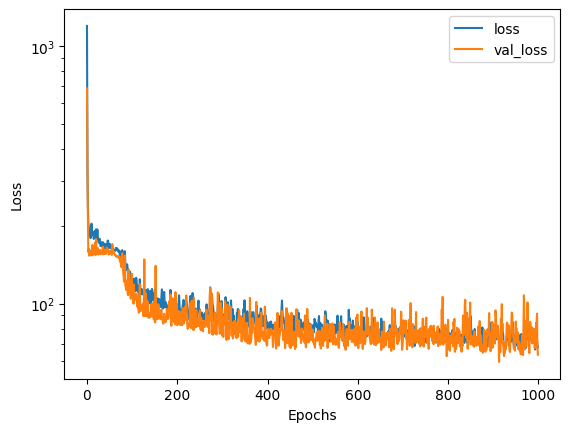

In [10]:
plt.plot(cnn.history['loss'], label='loss')
plt.plot(cnn.history['val_loss'], label='val_loss')

plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [11]:
predicted = model_cnn.predict(train_data)
predicted_test = model_cnn.predict(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [12]:
## Compute error metrics
def error_metrices(y_true_train, y_predicted_train, y_true_test, y_predicted_test):
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_predicted_train))
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_predicted_test))
    R2_train= r2_score(y_true_train, y_predicted_train)
    R2_test= r2_score(y_true_test, y_predicted_test)

    print('\n\n*********** Benchmark results ***********\n')
    print(f"R2    (Train/Test) = {R2_train:.3f} / {R2_test:.3f}")
    print(f"RMSE  (Train/Test) = {rmse_train:.3f} / {rmse_test:.3f}")
    

error_metrices(train_labels, predicted, test_labels, predicted_test)



*********** Benchmark results ***********

R2    (Train/Test) = 0.802 / 0.689
RMSE  (Train/Test) = 86.936 / 111.915


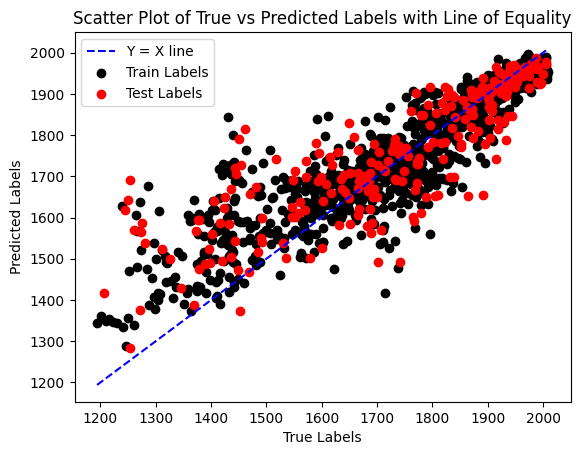

In [13]:
x_values = np.linspace(min(labels), max(labels), 100)

# Plot the line of equality (y=x)
plt.plot(x_values, x_values, color='blue', linestyle='--', label='Y = X line')

# Scatter plot for predicted values
plt.scatter(train_labels, predicted[:, 0], c='k', label='Train Labels')
plt.scatter(test_labels, predicted_test[:, 0], c='r', label='Test Labels')

# Labels, legend, and title
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.title('Scatter Plot of True vs Predicted Labels with Line of Equality')

# Show the plot
plt.show()